In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os

warnings.filterwarnings('ignore')
print(os.listdir("../input"))

['Mall_Customers.csv']


In [2]:
data = pd.read_csv('../input/Mall_Customers.csv')

In [3]:
print(data.shape)
print(data.dtypes)
print(data.isnull().sum())
data.head()

(200, 5)
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


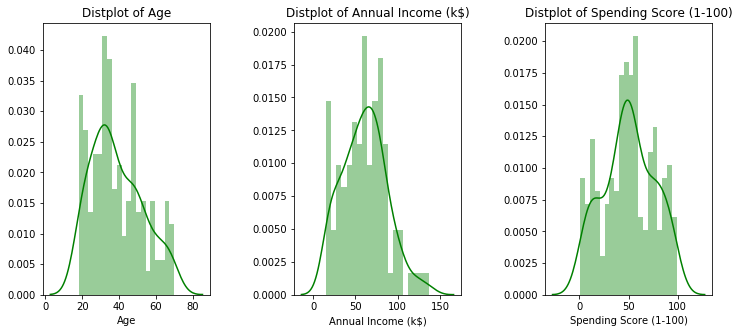

In [7]:
fig=plt.figure(figsize=(12,5))
cols=['Age','Annual Income (k$)','Spending Score (1-100)']
for i,x in enumerate(cols):
    fig.add_subplot(1,3,i+1)
    #subplots' space adjustment
    plt.subplots_adjust(wspace=0.5)
    sns.distplot(data[x], bins=20,color='g')
    plt.title("Distplot of {}".format(x))
plt.show()

Male       88
Female    112
Name: Gender, dtype: int64
Male      44.0
Female    56.0
Name: Gender, dtype: float64


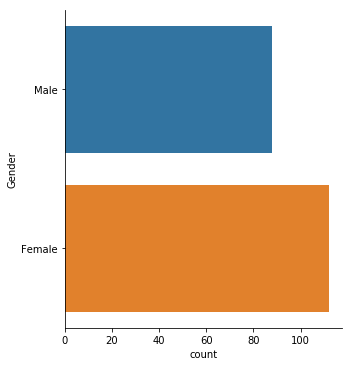

In [6]:
print(data['Gender'].value_counts().sort_values(ascending=True))
print((data['Gender'].value_counts()/data.shape[0]*100).sort_values(ascending=True))

sns.catplot(y='Gender', kind='count', data=data)
plt.show()

In [8]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


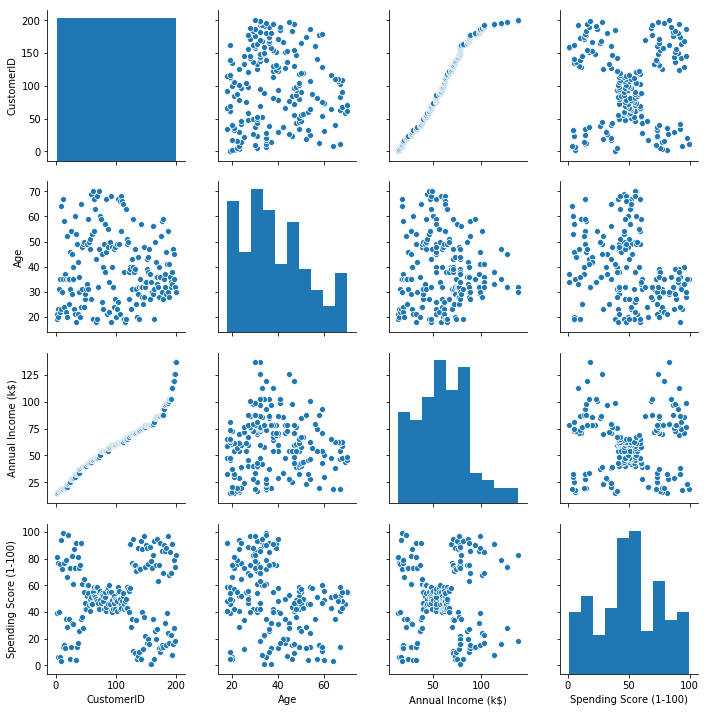

In [9]:
sns.pairplot(data)

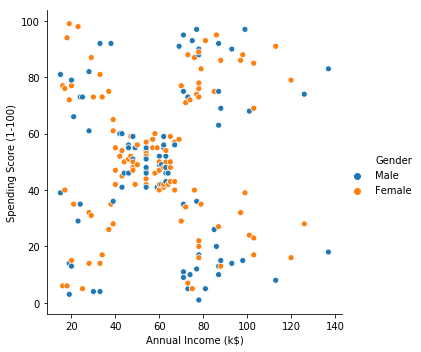

In [14]:
sns.relplot('Annual Income (k$)','Spending Score (1-100)', data=data, hue='Gender')

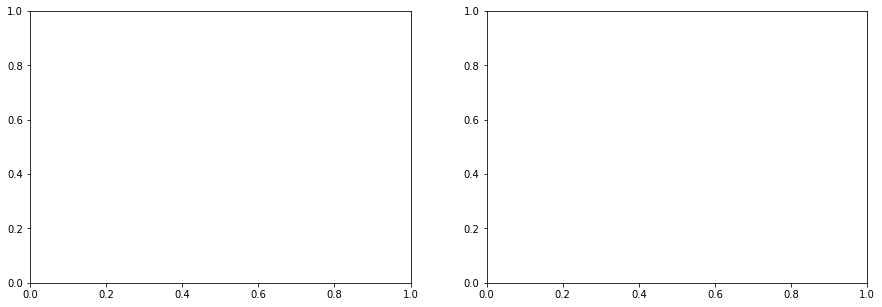

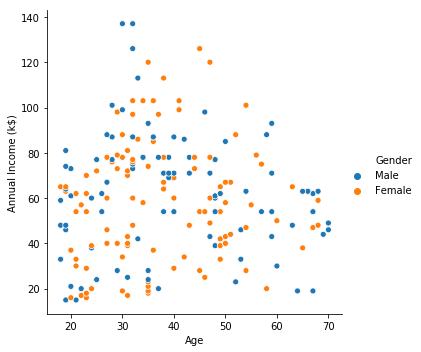

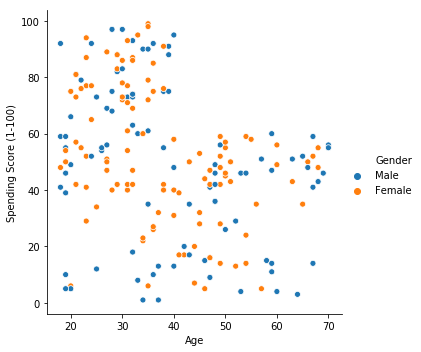

In [25]:
fig=plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
sns.relplot('Age','Annual Income (k$)', hue='Gender', data=data)

fig.add_subplot(1,2,2)
sns.relplot('Age','Spending Score (1-100)', hue='Gender', data=data)


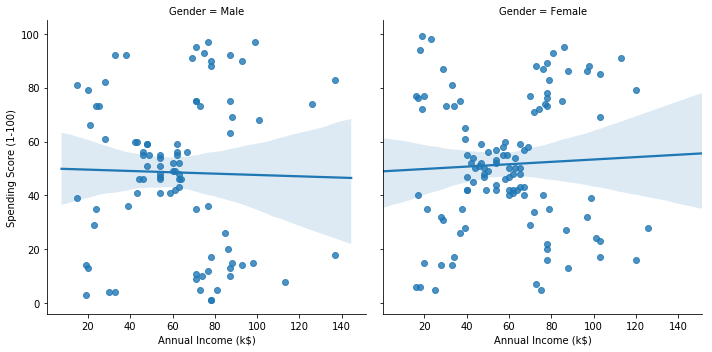

In [29]:
sns.lmplot('Annual Income (k$)','Spending Score (1-100)', col='Gender', data=data)

>Clustering using K-means

In [37]:
X1=data[['Age','Spending Score (1-100)']].values
inertia=[]
for n in range(1,11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append